In [1]:
import pandas as pd

# 读取数据
df = pd.read_csv('cleaned_charging_station_data_20240723_205829.csv')

# 查看数据结构
print(df.head())
print(df.info())


C:\Users\85407\AppData\Local\Temp\ipykernel_8584\2199546516.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_charging_station_data_20240723_205829.csv')


   city_id station_name  connector_id  coordinates_x  coordinates_y  \
0       80        50035             1       -4.61764       57.21494   
1       80        50035             1       -4.61764       57.21494   
2       80        50035             1       -4.61764       57.21494   
3       80        50035             1       -4.61764       57.21494   
4       80        50035             1       -4.61764       57.21494   

   tariff_amount  tariff_connectionfee  max_chargerate  is_available  hour  \
0           0.75                   1.5               7             0     1   
1           0.75                   1.5               7             0     2   
2           0.75                   1.5               7             0     3   
3           0.75                   1.5               7             0     4   
4           0.75                   1.5               7             0     5   

   ...  city_density_level  station_connector_count  \
0  ...                   1                       

In [2]:
# 按小时聚合数据，计算每个小时的平均可用性
hourly_availability = df.groupby('hour')['is_available'].mean().reset_index()

# 查看聚合结果
print(hourly_availability)


    hour  is_available
0      0      0.756374
1      1      0.760363
2      2      0.762535
3      3      0.761393
4      4      0.763397
5      5      0.762221
6      6      0.753649
7      7      0.745211
8      8      0.739590
9      9      0.728386
10    10      0.724188
11    11      0.721961
12    12      0.720840
13    13      0.719180
14    14      0.717845
15    15      0.719054
16    16      0.719962
17    17      0.723687
18    18      0.727806
19    19      0.730763
20    20      0.733937
21    21      0.736471
22    22      0.742336
23    23      0.751091


In [3]:
# 按星期几聚合数据，计算每个星期几的平均可用性
weekday_availability = df.groupby('day_of_week')['is_available'].mean().reset_index()

# 查看聚合结果
print(weekday_availability)


   day_of_week  is_available
0            0      0.735456
1            1      0.738529
2            2      0.723429
3            3      0.741017
4            4      0.741559
5            5      0.744318
6            6      0.743693


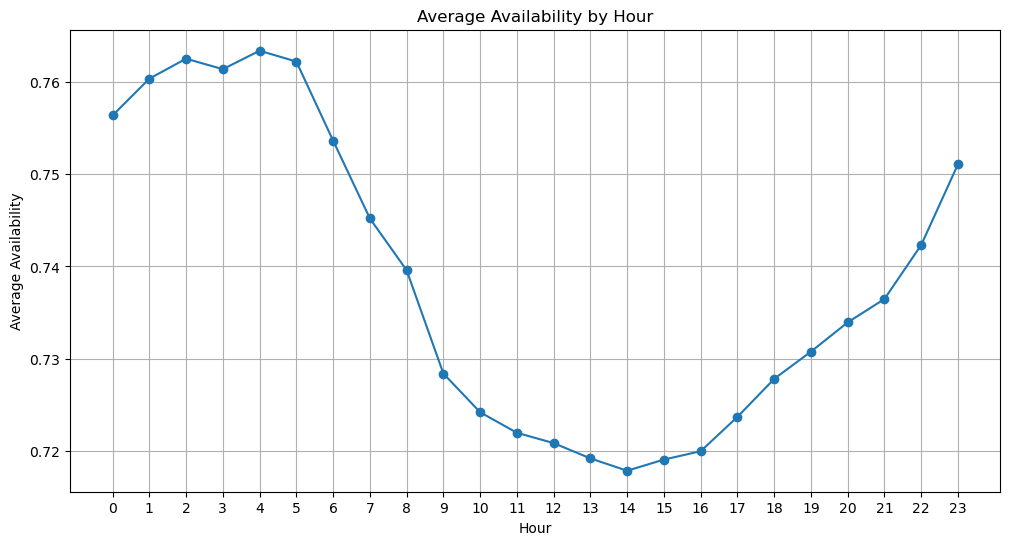

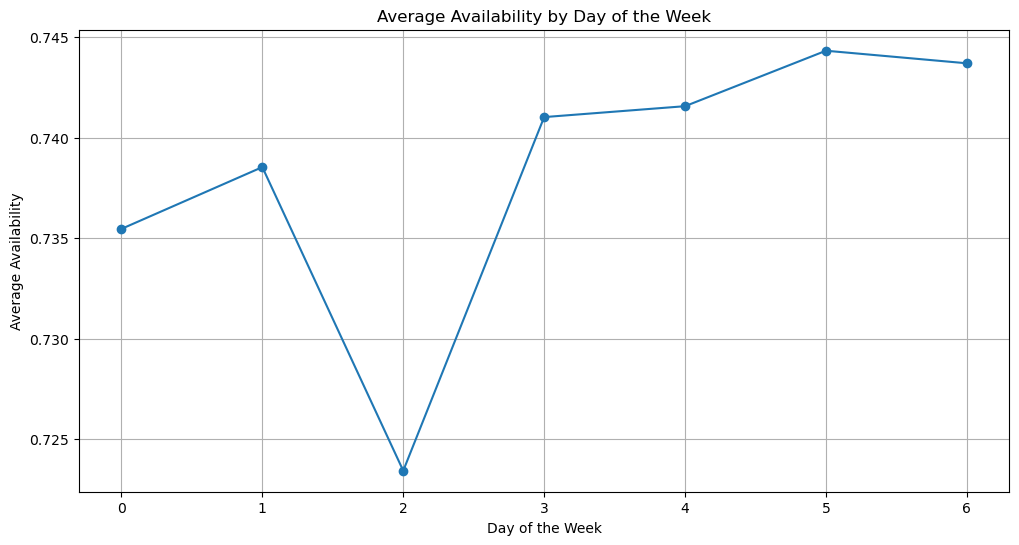

In [4]:
import matplotlib.pyplot as plt

# 按小时绘制可用性变化趋势
plt.figure(figsize=(12, 6))
plt.plot(hourly_availability['hour'], hourly_availability['is_available'], marker='o')
plt.title('Average Availability by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Availability')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

# 按星期几绘制可用性变化趋势
plt.figure(figsize=(12, 6))
plt.plot(weekday_availability['day_of_week'], weekday_availability['is_available'], marker='o')
plt.title('Average Availability by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Availability')
plt.grid(True)
plt.xticks(range(0, 7))
plt.show()


C:\Users\85407\AppData\Local\Temp\ipykernel_8584\3750903293.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('analysis.csv')


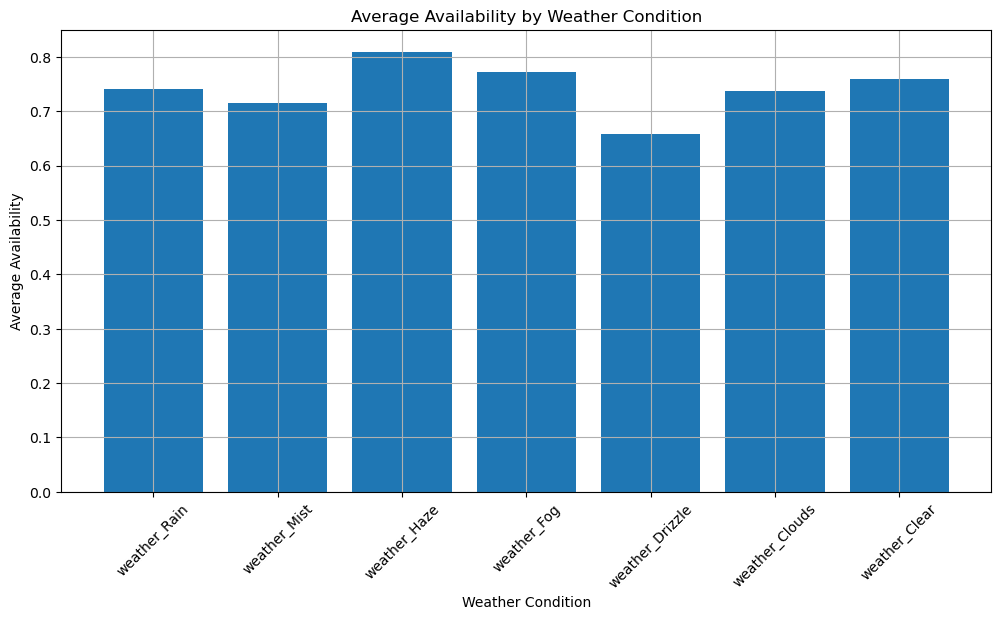

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('analysis.csv')

# 按天气条件聚合数据，计算每种天气条件下的平均可用性
weather_columns = ['weather_Clear', 'weather_Clouds', 'weather_Drizzle', 'weather_Fog', 
                   'weather_Haze', 'weather_Mist', 'weather_Rain']

weather_availability = df[weather_columns + ['is_available']].groupby(weather_columns).mean().reset_index()

# 计算每种天气条件的平均可用性
weather_availability['weather_condition'] = weather_availability[weather_columns].idxmax(axis=1)
weather_availability = weather_availability[['weather_condition', 'is_available']]

# 可视化不同天气条件下的可用性变化
plt.figure(figsize=(12, 6))
plt.bar(weather_availability['weather_condition'], weather_availability['is_available'])
plt.title('Average Availability by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Availability')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


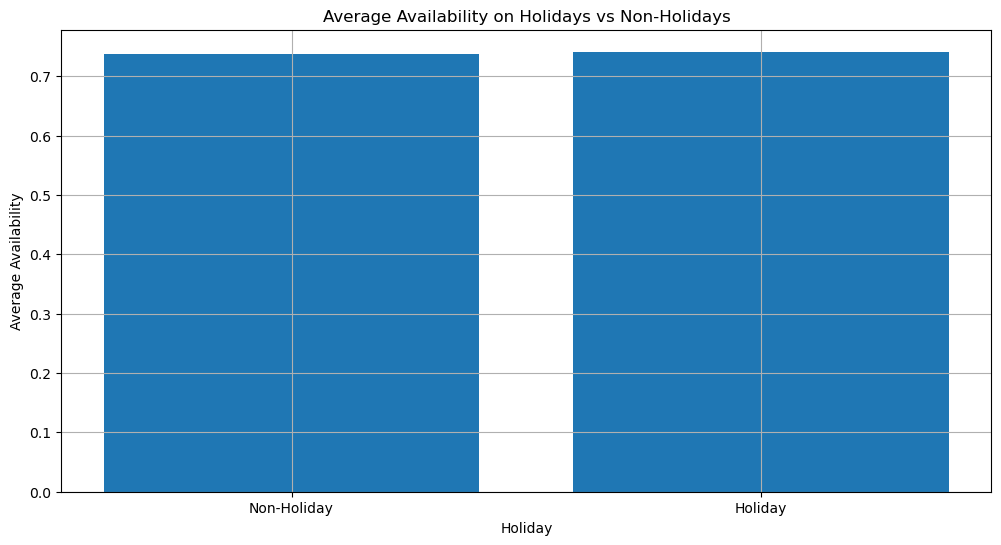

In [6]:
# 按节假日与非节假日聚合数据，计算平均可用性
holiday_availability = df.groupby('is_holiday')['is_available'].mean().reset_index()

# 可视化节假日与非节假日的可用性变化
plt.figure(figsize=(12, 6))
plt.bar(holiday_availability['is_holiday'].map({0: 'Non-Holiday', 1: 'Holiday'}), 
        holiday_availability['is_available'])
plt.title('Average Availability on Holidays vs Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Average Availability')
plt.grid(True)
plt.show()


In [7]:
import pandas as pd

# 读取数据
df = pd.read_csv('analysis.csv')

# 聚合数据，计算不同密度下的平均可用性
density_columns = ['city_density_level', 'station_density_10km', 'station_density_1km', 'station_density_20km']

density_availability = df[density_columns + ['is_available']].groupby(density_columns).mean().reset_index()

# 查看聚合结果
print(density_availability)


C:\Users\85407\AppData\Local\Temp\ipykernel_8584\980843125.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('analysis.csv')


      city_density_level  station_density_10km  station_density_1km  \
0                      1                     0                    0   
1                      1                     0                    0   
2                      1                     0                    0   
3                      1                     0                    0   
4                      1                     0                    0   
...                  ...                   ...                  ...   
1239                   5                   106                    3   
1240                   5                   113                    0   
1241                   5                   133                   23   
1242                   5                   151                    0   
1243                   5                   158                   19   

      station_density_20km  is_available  
0                        0      0.603774  
1                        1      0.840970  
2                 

In [8]:
# 计算描述性统计量
descriptive_stats = density_availability.describe()

# 查看统计结果
print(descriptive_stats)


       city_density_level  station_density_10km  station_density_1km  \
count         1244.000000           1244.000000          1244.000000   
mean             2.364952             85.064309             5.127010   
std              0.992454             90.487083             7.326866   
min              1.000000              0.000000             0.000000   
25%              2.000000             12.000000             1.000000   
50%              2.000000             42.000000             2.000000   
75%              3.000000            133.000000             7.000000   
max              5.000000            321.000000            71.000000   

       station_density_20km  is_available  
count           1244.000000   1244.000000  
mean             204.740354      0.713663  
std              179.962455      0.298422  
min                0.000000      0.000000  
25%               39.750000      0.593614  
50%              155.000000      0.826771  
75%              327.250000      0.940364  

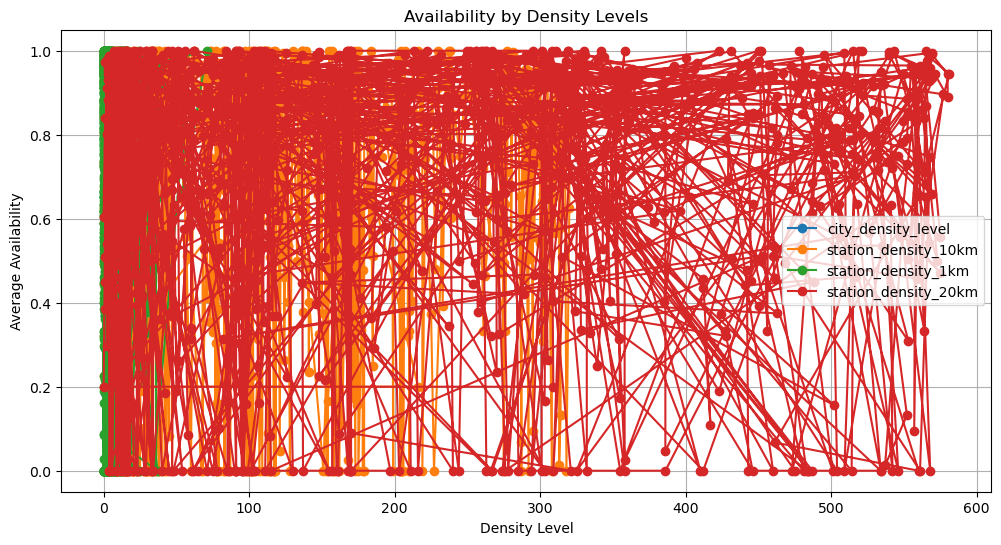

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可视化不同密度下的平均可用性
plt.figure(figsize=(12, 6))
for column in density_columns:
    plt.plot(density_availability[column], density_availability['is_available'], marker='o', label=column)

plt.title('Availability by Density Levels')
plt.xlabel('Density Level')
plt.ylabel('Average Availability')
plt.legend()
plt.grid(True)
plt.show()


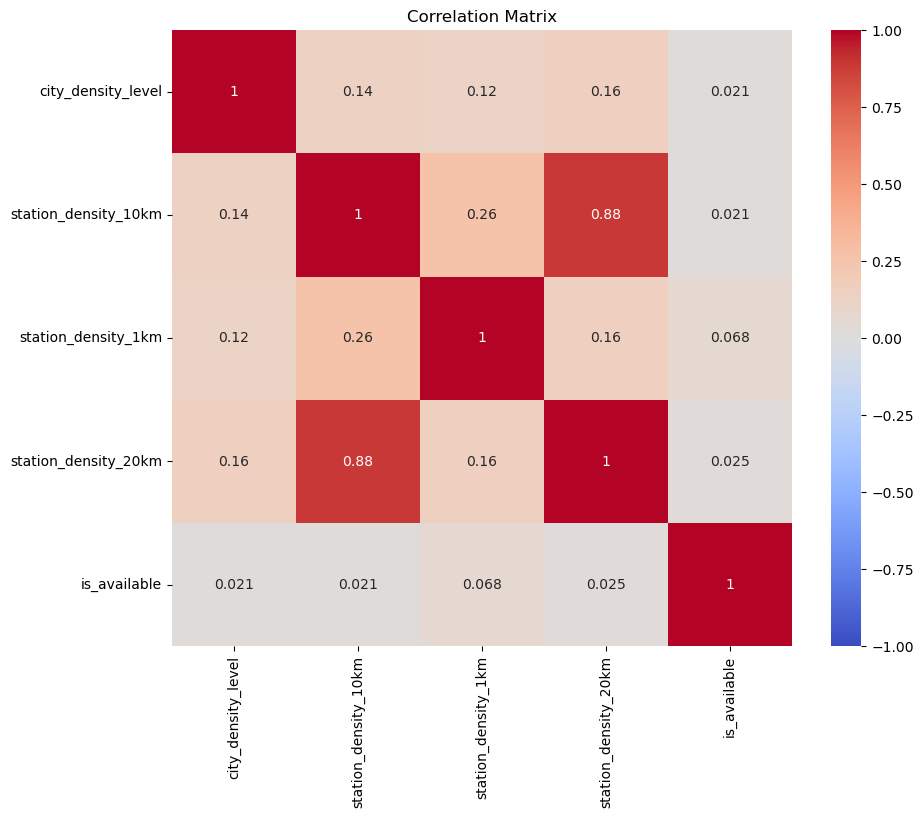

In [10]:
# 计算相关性矩阵
correlation_matrix = df[density_columns + ['is_available']].corr()

# 绘制相关性热图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     33952
           1       0.74      1.00      0.85     95982

    accuracy                           0.74    129934
   macro avg       0.37      0.50      0.42    129934
weighted avg       0.55      0.74      0.63    129934

Confusion Matrix:
[[    0 33952]
 [    0 95982]]


D:\ANA\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ANA\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ANA\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


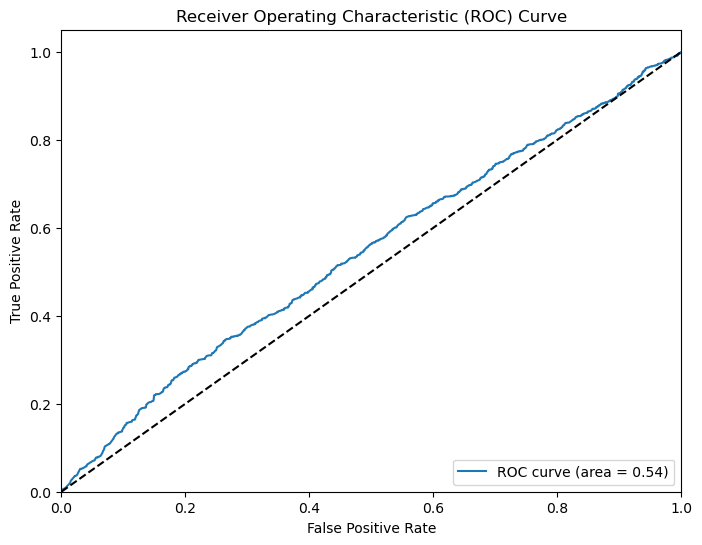

Model Coefficients:
                      Coefficient
city_density_level       0.022458
station_density_10km    -0.001147
station_density_1km      0.016323
station_density_20km     0.000631


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 特征和目标变量
X = df[density_columns]
y = df['is_available']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练逻辑回归模型
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# 预测
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# 输出分类报告和混淆矩阵
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC曲线和AUC值
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 模型系数
coefficients = pd.DataFrame(log_reg.coef_.T, index=density_columns, columns=['Coefficient'])
print("Model Coefficients:")
print(coefficients)


In [12]:
# 计算逻辑回归模型的准确性
accuracy = log_reg.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

# 使用假设检验检查不同密度水平间的可用性差异
from scipy.stats import ttest_ind

# 假设测试，检查不同密度水平间的可用性差异
density_level_groups = df.groupby('city_density_level')['is_available'].apply(list)

# 对最高和最低密度水平进行T检验
t_stat, p_val = ttest_ind(density_level_groups[min(density_level_groups.keys())], 
                          density_level_groups[max(density_level_groups.keys())])

print(f'T-statistic: {t_stat}, P-value: {p_val}')



Accuracy: 0.7386981082703526
T-statistic: -10.83591387670254, P-value: 2.380246053988627e-27


In [13]:
import pandas as pd

# 读取数据
df = pd.read_csv('analysis.csv')

# 提取每个充电站的最大充电速度和坐标
stations = df[['station_name', 'coordinates_x', 'coordinates_y', 'max_chargerate']].drop_duplicates()

# 查看充电站数据
print(stations.head())


C:\Users\85407\AppData\Local\Temp\ipykernel_8584\4164681902.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('analysis.csv')


    station_name  coordinates_x  coordinates_y  max_chargerate
0          50035       -4.61764       57.21494               7
212        50055       -3.18617       55.94840              22
424        50059       -3.18617       55.94840              22
636        50141       -3.07473       55.89394               7
848        50142       -3.15398       55.87975               7


In [14]:
from sklearn.neighbors import BallTree
import numpy as np

# 将坐标转换为numpy数组
coords = stations[['coordinates_x', 'coordinates_y']].to_numpy()

# 创建BallTree进行空间查询
tree = BallTree(np.deg2rad(coords), metric='haversine')

# 定义查询范围10km，地球半径约为6371km
radius = 10 / 6371.0

# 计算每个充电站10km范围内其他充电站的平均最大充电速率
average_max_chargerate = []

for coord in np.deg2rad(coords):
    # 查询范围内的充电站索引
    idx = tree.query_radius([coord], r=radius)[0]
    # 计算平均最大充电速率
    avg_rate = stations.iloc[idx]['max_chargerate'].mean()
    average_max_chargerate.append(avg_rate)

# 添加平均最大充电速率到充电站数据
stations['avg_max_chargerate_10km'] = average_max_chargerate

# 查看结果
print(stations.head())


    station_name  coordinates_x  coordinates_y  max_chargerate  \
0          50035       -4.61764       57.21494               7   
212        50055       -3.18617       55.94840              22   
424        50059       -3.18617       55.94840              22   
636        50141       -3.07473       55.89394               7   
848        50142       -3.15398       55.87975               7   

     avg_max_chargerate_10km  
0                   7.000000  
212                22.072993  
424                22.072993  
636                23.933333  
848                21.386364  


In [15]:
# 将充电站的平均最大充电速率合并到原始数据集中
df = df.merge(stations[['station_name', 'avg_max_chargerate_10km']], on='station_name', how='left')

# 查看合并结果
print(df.head())


   city_id station_name  connector_id  coordinates_x  coordinates_y  \
0       80        50035             1       -4.61764       57.21494   
1       80        50035             1       -4.61764       57.21494   
2       80        50035             1       -4.61764       57.21494   
3       80        50035             1       -4.61764       57.21494   
4       80        50035             1       -4.61764       57.21494   

   tariff_amount  tariff_connectionfee  max_chargerate  is_available  hour  \
0           0.75                   1.5               7             0     1   
1           0.75                   1.5               7             0     2   
2           0.75                   1.5               7             0     3   
3           0.75                   1.5               7             0     4   
4           0.75                   1.5               7             0     5   

   ...  station_connector_count  station_avg_max_chargerate  \
0  ...                        2          

In [16]:
# 分析周围充电站最大速率与可用性的关系
correlation = df[['avg_max_chargerate_10km', 'is_available']].corr()

# 输出相关性
print(correlation)


                         avg_max_chargerate_10km  is_available
avg_max_chargerate_10km                  1.00000      -0.03201
is_available                            -0.03201       1.00000


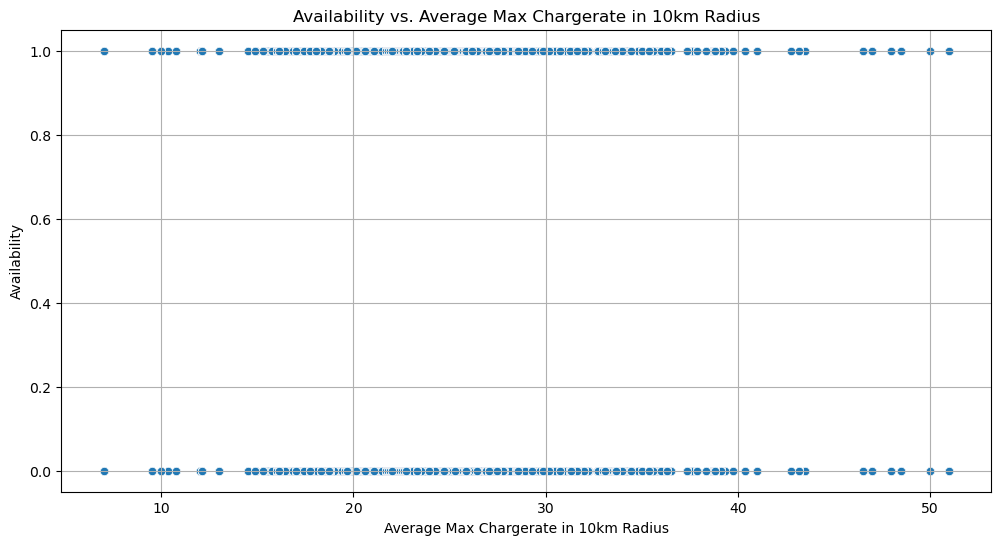

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可视化周围充电站最大速率与可用性的关系
plt.figure(figsize=(12, 6))
sns.scatterplot(x='avg_max_chargerate_10km', y='is_available', data=df)
plt.title('Availability vs. Average Max Chargerate in 10km Radius')
plt.xlabel('Average Max Chargerate in 10km Radius')
plt.ylabel('Availability')
plt.grid(True)
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     45742
           1       0.73      1.00      0.84    120867

    accuracy                           0.73    166609
   macro avg       0.36      0.50      0.42    166609
weighted avg       0.53      0.73      0.61    166609

Confusion Matrix:


D:\ANA\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ANA\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ANA\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[     0  45742]
 [     0 120867]]


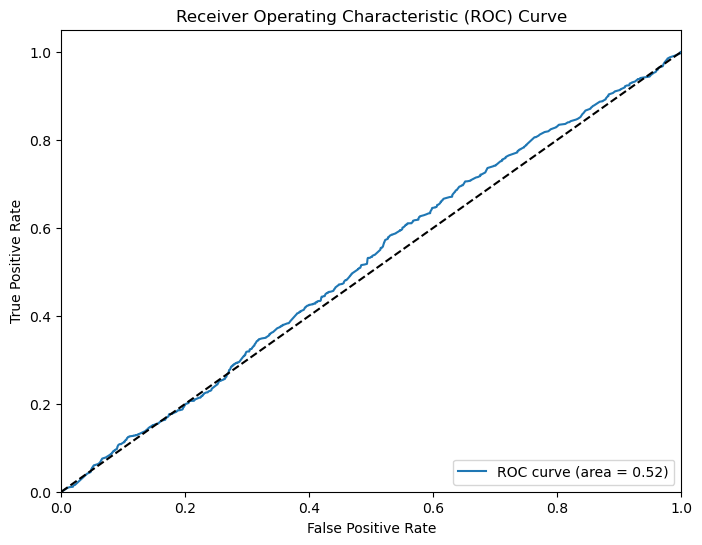

Model Coefficients:
                         Coefficient
avg_max_chargerate_10km    -0.011216


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# 特征和目标变量
X = df[['avg_max_chargerate_10km']]
y = df['is_available']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练逻辑回归模型
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# 预测
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# 输出分类报告和混淆矩阵
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC曲线和AUC值
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 模型系数
coefficients = pd.DataFrame(log_reg.coef_.T, index=['avg_max_chargerate_10km'], columns=['Coefficient'])
print("Model Coefficients:")
print(coefficients)
